# Module 1: From Expert Rules to General Intelligence
## A History of Medical AI (1970s - 2025)

**Goal:** Understand how AI architectures evolved to solve medical problems, and why each era moved on.

### How to use this notebook
- Run the cells in order from top to bottom.
- Edit the interactive cells to see how choices change outputs.
- This module is **conceptual**. No model training is required.

### Learning objectives
1. Distinguish between rule-based AI and modern machine learning.
2. Understand the AI winter in medicine and why early promises failed.
3. Identify the clinical bottlenecks that led to deep learning and generative AI.
4. Evaluate the trade-off between explainability (rules) and performance (neural nets).

## Section 0: Introduction and Timeline
**Definition (simple):** AI is when machines do tasks that usually require human intelligence.

## Helper Functions
Run this cell once at the start. It auto-configures paths in Google Colab and does nothing harmful on local Jupyter.

In [10]:
import os
import sys
import subprocess
from pathlib import Path

def setup_repo_for_colab(
    repo_url='https://github.com/aaekay/Medical-AI-101.git',
    repo_dir='/content/Medical-AI-101',
    notebook_dir='chapters',
):
    if 'google.colab' not in sys.modules:
        print(f'Local runtime detected. Working directory: {Path.cwd()}')
        return

    repo_path = Path(repo_dir)
    if not repo_path.exists():
        print('Cloning Medical-AI-101 into /content ...')
        subprocess.check_call(['git', 'clone', repo_url, str(repo_path)])

    target = repo_path / notebook_dir
    os.chdir(target)
    print(f'Colab ready. Working directory: {Path.cwd()}')

setup_repo_for_colab()


Local runtime detected. Working directory: /Users/aaekay/Documents/projects/Medical-AI-101/chapters


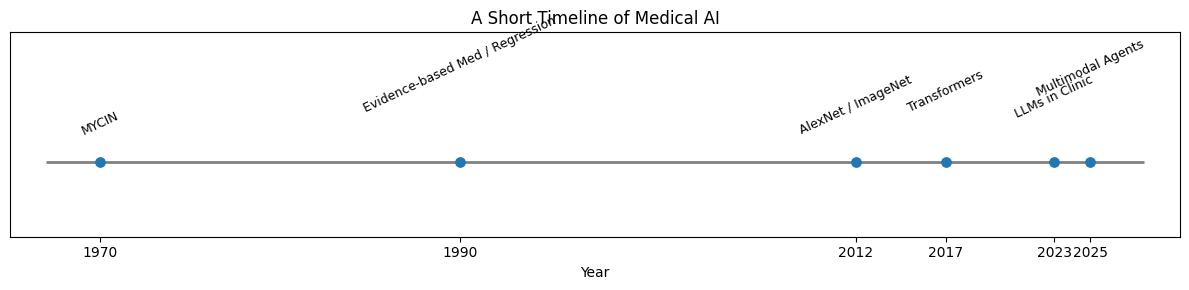

In [11]:
import matplotlib.pyplot as plt

years = [1970, 1990, 2012, 2017, 2023, 2025]
labels = [
    'MYCIN',
    'Evidence-based Med / Regression',
    'AlexNet / ImageNet',
    'Transformers',
    'LLMs in Clinic',
    'Multimodal Agents',
]

fig, ax = plt.subplots(figsize=(12, 3))
ax.hlines(1, min(years) - 3, max(years) + 3, color='gray', linewidth=2)
ax.scatter(years, [1] * len(years), color='#1f77b4', zorder=3, s=45)

for idx, (x, label) in enumerate(zip(years, labels)):
    # Stagger label heights to avoid overlap near recent years.
    y_offset = 18 if idx % 2 == 0 else 34
    if x >= 2020:
        y_offset += 12
    ax.annotate(
        label,
        xy=(x, 1),
        xytext=(0, y_offset),
        textcoords='offset points',
        ha='center',
        va='bottom',
        rotation=25,
        fontsize=9,
    )

ax.set_xlim(min(years) - 5, max(years) + 5)
ax.set_ylim(0.8, 1.35)
ax.set_yticks([])
ax.set_xticks(years)
ax.set_xlabel('Year')
ax.set_title('A Short Timeline of Medical AI')
plt.tight_layout()
plt.show()


## Section 1: The Era of Logical Reasoning (1970s - 1980s)
**Clinical problem:** Bacteremia and meningitis.
Doctors needed help selecting antibiotics for severe infections based on incomplete lab data.

**AI solution:** Expert systems (symbolic AI), such as MYCIN.
These systems used **if-then** rules written by human experts.

### Interactive demo: Build your own expert system
The function below contains a bug that leads to a wrong antibiotic choice.
Fix the logic to make it safer.

![MYCIN Interface Placeholder](../assets/mycin_interface_placeholder.png)


In [12]:
def prescribe_antibiotic(gram_stain, morphology, patient_age):
    '''
    A tiny rule-based system. This is intentionally simple and not for real clinical use.
    '''
    gram_stain = gram_stain.lower().strip()
    morphology = morphology.lower().strip()

    # TODO: Fix the rule so gram-positive cocci do not get a broad gram-negative antibiotic.
    if gram_stain == "positive" and morphology == "cocci":
        return "gentamicin"  # Bug: this is not the best choice in this toy example.
    if gram_stain == "negative" and morphology == "rod":
        return "ceftriaxone"
    if patient_age < 1:
        return "ampicillin"
    return "supportive care"

In [13]:
# Try a few inputs
print(prescribe_antibiotic("positive", "cocci", 45))
print(prescribe_antibiotic("negative", "rod", 60))
print(prescribe_antibiotic("positive", "rod", 0))

gentamicin
ceftriaxone
ampicillin


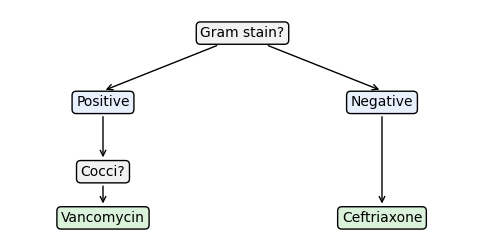

In [14]:
# A simple flowchart-style visual of the rule path
fig, ax = plt.subplots(figsize=(6, 3))
ax.axis("off")

ax.text(0.5, 0.9, "Gram stain?", ha="center", va="center", bbox=dict(boxstyle="round", fc="#f2f2f2"))
ax.text(0.2, 0.6, "Positive", ha="center", va="center", bbox=dict(boxstyle="round", fc="#e8f0fe"))
ax.text(0.8, 0.6, "Negative", ha="center", va="center", bbox=dict(boxstyle="round", fc="#e8f0fe"))
ax.text(0.2, 0.3, "Cocci?", ha="center", va="center", bbox=dict(boxstyle="round", fc="#f2f2f2"))
ax.text(0.2, 0.1, "Vancomycin", ha="center", va="center", bbox=dict(boxstyle="round", fc="#d9f2d9"))
ax.text(0.8, 0.1, "Ceftriaxone", ha="center", va="center", bbox=dict(boxstyle="round", fc="#d9f2d9"))

ax.annotate("", xy=(0.2, 0.65), xytext=(0.45, 0.85), arrowprops=dict(arrowstyle="->"))
ax.annotate("", xy=(0.8, 0.65), xytext=(0.55, 0.85), arrowprops=dict(arrowstyle="->"))
ax.annotate("", xy=(0.2, 0.35), xytext=(0.2, 0.55), arrowprops=dict(arrowstyle="->"))
ax.annotate("", xy=(0.2, 0.15), xytext=(0.2, 0.25), arrowprops=dict(arrowstyle="->"))
ax.annotate("", xy=(0.8, 0.15), xytext=(0.8, 0.55), arrowprops=dict(arrowstyle="->"))

plt.show()

### Post-mortem
- Advantage: perfectly explainable (white box).
- Disadvantage: the **knowledge bottleneck**. Medicine is too complex to hard-code.

### The AI winter (briefly)
Expert systems did not scale, data was limited, and compute was expensive. Hype ran ahead of results, and investment cooled.

## Section 2: The Era of Pattern Recognition (1990s - 2010)
**Clinical problem:** Cardiovascular risk prediction.
We now have structured data (age, LDL, blood pressure, smoking), but rules are too subtle.

**AI solution:** Statistical machine learning (logistic regression, SVMs, random forests).
Instead of writing rules, we **learn** a decision boundary from data.

In [15]:
import numpy as np
import pandas as pd
from pathlib import Path

def resolve_data_path(filename):
    candidates = [Path('../data') / filename, Path('data') / filename]
    for cand in candidates:
        if cand.exists():
            return cand
    raise FileNotFoundError(f'Could not locate {filename} in ../data or data/.')

DATA_PATH = resolve_data_path('module_01_cardiac_risk.csv')
df = pd.read_csv(DATA_PATH)
print(f'Loaded {len(df)} rows from {DATA_PATH}')
df.head()


Loaded 20 rows from ../data/module_01_cardiac_risk.csv


,age,ldl,sbp,smoke,risk_label
0,77,177,137,0,1
1,65,116,117,0,0
2,67,120,167,0,0
3,75,113,112,0,0
4,63,166,168,1,1


### Interactive demo: From risk formula to clinical policy
Use two controls:
- **LDL weight**: how strongly cholesterol influences the score.
- **Threshold**: how strict the high-risk cutoff is.

Watch what changes:
- The decision boundary in LDL vs systolic BP space.
- Sensitivity, specificity, and accuracy as threshold changes.

This mirrors real practice: model structure matters, but operating threshold is a policy choice.

In [ ]:
try:
    import ipywidgets as widgets
except ImportError as exc:
    raise ImportError('ipywidgets is required for the interactive slider.') from exc

features = df[['age', 'ldl', 'sbp', 'smoke']]
means = features.mean()
stds = features.std(ddof=0)

w_age = 0.9
w_sbp = 0.8
w_smoke = 0.7
y_true = df['risk_label'].astype(int).to_numpy()

def make_score(weight_chol=1.0):
    z = (features - means) / stds
    score = (
        w_age * z['age']
        + weight_chol * z['ldl']
        + w_sbp * z['sbp']
        + w_smoke * z['smoke']
    )
    return score

def metric_bundle(y_true, y_pred):
    tp = int(((y_true == 1) & (y_pred == 1)).sum())
    tn = int(((y_true == 0) & (y_pred == 0)).sum())
    fp = int(((y_true == 0) & (y_pred == 1)).sum())
    fn = int(((y_true == 1) & (y_pred == 0)).sum())

    sensitivity = tp / (tp + fn) if (tp + fn) else 0.0
    specificity = tn / (tn + fp) if (tn + fp) else 0.0
    accuracy = (tp + tn) / len(y_true) if len(y_true) else 0.0

    return {
        'tp': tp,
        'tn': tn,
        'fp': fp,
        'fn': fn,
        'sensitivity': sensitivity,
        'specificity': specificity,
        'accuracy': accuracy,
    }

def show_boundary(weight_chol=1.0, threshold=0.0):
    score = make_score(weight_chol=weight_chol)
    y_pred = (score >= threshold).astype(int).to_numpy()
    m = metric_bundle(y_true, y_pred)

    fig, axes = plt.subplots(1, 2, figsize=(12, 4.5))

    # Left panel: LDL vs SBP with current boundary.
    colors = df['risk_label'].map({0: '#2ca02c', 1: '#d62728'})
    axes[0].scatter(df['ldl'], df['sbp'], c=colors, alpha=0.85, s=75, edgecolor='black', linewidth=0.5)

    mis = y_pred != y_true
    if mis.any():
        axes[0].scatter(
            df.loc[mis, 'ldl'],
            df.loc[mis, 'sbp'],
            marker='x',
            s=120,
            linewidth=2,
            color='#ffbf00',
            label='Misclassified',
        )

    ldl_vals = np.linspace(df['ldl'].min() - 5, df['ldl'].max() + 5, 80)
    z_ldl = (ldl_vals - means['ldl']) / stds['ldl']
    z_sbp = (threshold - weight_chol * z_ldl) / w_sbp
    sbp_vals = z_sbp * stds['sbp'] + means['sbp']
    axes[0].plot(ldl_vals, sbp_vals, color='#1f77b4', linewidth=2.2, label='Decision boundary')

    axes[0].set_xlabel('LDL (mg/dL)')
    axes[0].set_ylabel('Systolic BP (mmHg)')
    axes[0].set_title('Current boundary in LDL vs SBP space')
    axes[0].legend(loc='lower right')

    # Right panel: threshold tradeoff curves for this LDL weight.
    threshold_grid = np.linspace(-2.5, 2.5, 120)
    sens_curve, spec_curve, acc_curve = [], [], []
    for t in threshold_grid:
        y_hat = (score >= t).astype(int).to_numpy()
        mt = metric_bundle(y_true, y_hat)
        sens_curve.append(mt['sensitivity'])
        spec_curve.append(mt['specificity'])
        acc_curve.append(mt['accuracy'])

    axes[1].plot(threshold_grid, sens_curve, label='Sensitivity', color='#d62728', linewidth=2)
    axes[1].plot(threshold_grid, spec_curve, label='Specificity', color='#2ca02c', linewidth=2)
    axes[1].plot(threshold_grid, acc_curve, label='Accuracy', color='#1f77b4', linestyle='--', linewidth=2)
    axes[1].axvline(threshold, color='black', linestyle=':', linewidth=1.8, label='Chosen threshold')
    axes[1].set_ylim(0, 1.02)
    axes[1].set_xlabel('Threshold')
    axes[1].set_ylabel('Metric value')
    axes[1].set_title('Policy tradeoff (same model, different cutoff)')
    axes[1].legend(loc='best')

    fig.suptitle(
        f"LDL weight={weight_chol:.2f} | Threshold={threshold:.2f} | "
        f"Acc={m['accuracy']:.2f}, Sens={m['sensitivity']:.2f}, Spec={m['specificity']:.2f}",
        fontsize=11,
    )
    plt.tight_layout()
    plt.show()

    print(
        f"Confusion counts -> TP: {m['tp']}, FP: {m['fp']}, FN: {m['fn']}, TN: {m['tn']}"
    )

widgets.interact(
    show_boundary,
    weight_chol=widgets.FloatSlider(value=1.0, min=0.0, max=2.5, step=0.1, description='LDL wt', continuous_update=False),
    threshold=widgets.FloatSlider(value=0.0, min=-2.5, max=2.5, step=0.1, description='Threshold', continuous_update=False),
)


interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='LDL wt', max=2.5), FloatSli…

<function __main__.show_boundary(weight_chol=1.0, threshold=0.0)>

### Post-mortem
- Advantage: can handle more data than humans and is repeatable.
- Disadvantage: needs structured data and struggles with images or free text.

## Section 3: The Perceptual Revolution (2012 - 2022)
**Clinical problem:** Diabetic retinopathy screening and radiology.
Images are unstructured. You cannot turn pixels into an Excel sheet without losing information.

**AI solution:** Deep learning with convolutional neural networks (CNNs).
CNNs learn features (edges, shapes) automatically from pixels.

### Interactive demo: The pixel problem

![Chest X-ray Placeholder](../assets/chest_xray_placeholder.png)


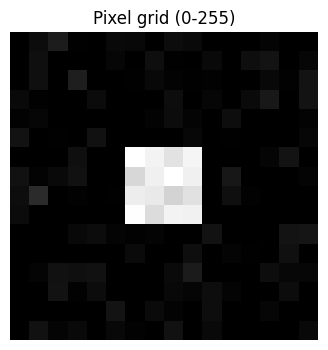

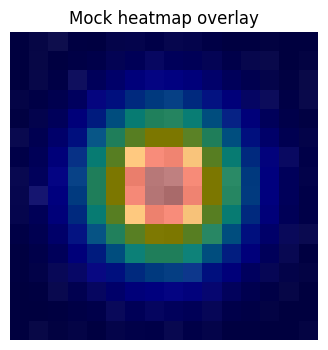

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Fake "X-ray" patch: a bright blob in the center
img = np.zeros((16, 16))
img[6:10, 6:10] = 200
img = img + np.random.normal(0, 10, size=img.shape)
img = np.clip(img, 0, 255)

plt.figure(figsize=(4, 4))
plt.imshow(img, cmap="gray")
plt.title("Pixel grid (0-255)")
plt.axis("off")
plt.show()

# Mock model heatmap (not a real model)
x = np.linspace(-1, 1, 16)
X, Y = np.meshgrid(x, x)
heatmap = np.exp(-4 * (X**2 + Y**2))

plt.figure(figsize=(4, 4))
plt.imshow(img, cmap="gray")
plt.imshow(heatmap, cmap="jet", alpha=0.5)
plt.title("Mock heatmap overlay")
plt.axis("off")
plt.show()

### Post-mortem
- Advantage: strong performance on visual tasks.
- Disadvantage: black box decisions and large data requirements.

## Section 4: The Generative Era (2023 - 2025)
**Clinical problem:** Administrative burden and synthesis.
Clinicians spend large amounts of time writing notes and summarizing records.

**AI solution:** Large language models (transformers) and multimodal AI.
These models learn patterns in language and can generate structured text.

### Interactive demo: The scribe
This is a **mock** example that expands shorthand into a cleaner format.

In [ ]:
try:
    import ipywidgets as widgets
    from IPython.display import display
except ImportError as exc:
    raise ImportError("ipywidgets is required for the interactive demo.") from exc

abbrev_map = {
    "pt": "patient",
    "c/o": "complains of",
    "sob": "shortness of breath",
    "x": "for",
    "d": "days",
    "h/o": "history of",
}


def expand_note(text):
    words = text.split()
    expanded = []
    for word in words:
        key = word.lower().strip(".,")
        expanded.append(abbrev_map.get(key, word))
    return " ".join(expanded)


def format_letter(text):
    expanded = expand_note(text)
    return (
        "Insurance Claim Summary"
        "------------------------"
        f"Reason for visit: {expanded}"
        "Plan: Follow up in 1 week."
    )


note_input = widgets.Textarea(
    value="Pt c/o SOB x 3 d. H/O asthma.",
    description="Note",
    layout=widgets.Layout(width="100%", height="120px"),
)
button = widgets.Button(description="Process")
output = widgets.Output()


def on_click(_):
    with output:
        output.clear_output()
        print(format_letter(note_input.value))


button.on_click(on_click)

display(note_input, button, output)

Textarea(value='Pt c/o SOB x 3 d. H/O asthma.', description='Note', layout=Layout(height='120px', width='100%'…

Button(description='Process', style=ButtonStyle())

Output()

### Post-mortem
- Advantage: can handle context and draft useful text quickly.
- Disadvantage: hallucinations and bias can lead to unsafe output.

## Wrap-up: Key takeaways
- AI in medicine evolved because clinical problems and data types changed.
- Rule-based systems are explainable but brittle.
- Machine learning and deep learning scale better but can be opaque.
- Generative models are powerful, but safety and reliability remain major concerns.